# Tests: bbox_delimiters
***


### 1. Importing and Installing Packages
***

In [ ]:
!pip install lungs-segmentation

In [31]:
from bbox_delimiters import bbox_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

### 2. Testing some of the defined functions
***

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Chest_Xray_PA_3-8-2010.png/739px-Chest_Xray_PA_3-8-2010.png
model = bbox_utils().model_segmentation(architecture = 'resnet34')

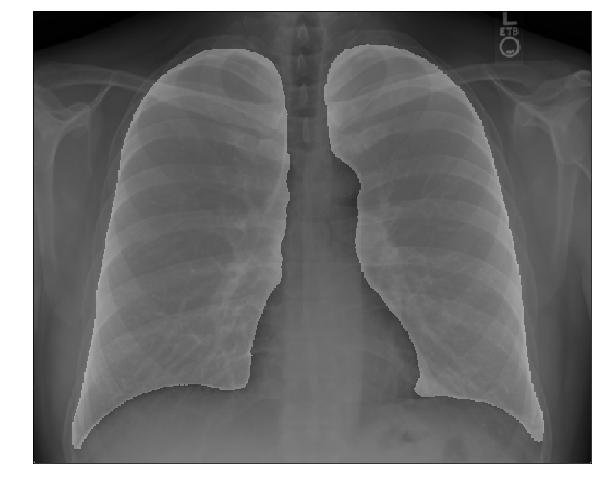

In [6]:
plt.figure(figsize = (10, 20))
image, mask = bbox_utils().make_segmentation(model = model, path_image = '739px-Chest_Xray_PA_3-8-2010.png')
plt.imshow(image, cmap = 'gray', vmin = np.min(image), vmax = np.max(image))
plt.imshow(mask[0]+ mask[1], alpha = 0.5, cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


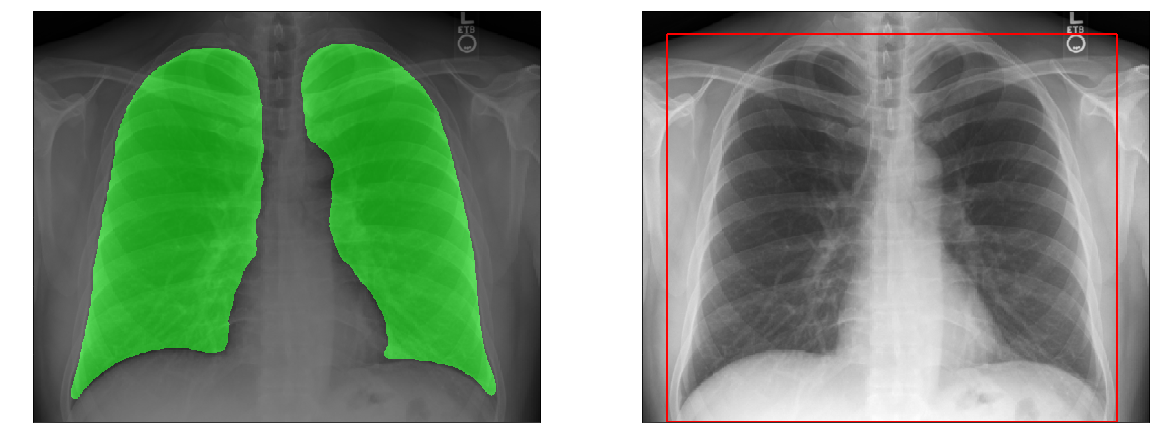

In [7]:
mask = bbox_utils().join_masks(lung_left = mask[0], lung_right = mask[1])
contours = bbox_utils().get_contours(mask = mask, erode_radius = 10)
contours = bbox_utils().find_two_best_areas(contours = contours)
mask_contours = bbox_utils().draw_contours(contours = contours, image_shape = image.shape, dilate_radius = 6)

plt.figure(figsize = (20, 20))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray', vmin = np.min(image), vmax = np.max(image))
plt.imshow(mask_contours, cmap = 'gray', alpha = 0.5, vmin = np.min(mask_contours), vmax = np.max(mask_contours))

plt.subplot(1, 2, 2)
coordinates = bbox_utils().extract_coordinates(mask = mask_contours, list_of_margins = [8, 8, 20, 8])
img_with_rectangle = bbox_utils().draw_rectangle(image = image, list_coordinates = coordinates)
plt.imshow(img_with_rectangle, cmap = 'gray', vmin = np.min(img_with_rectangle), vmax = np.max(img_with_rectangle))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


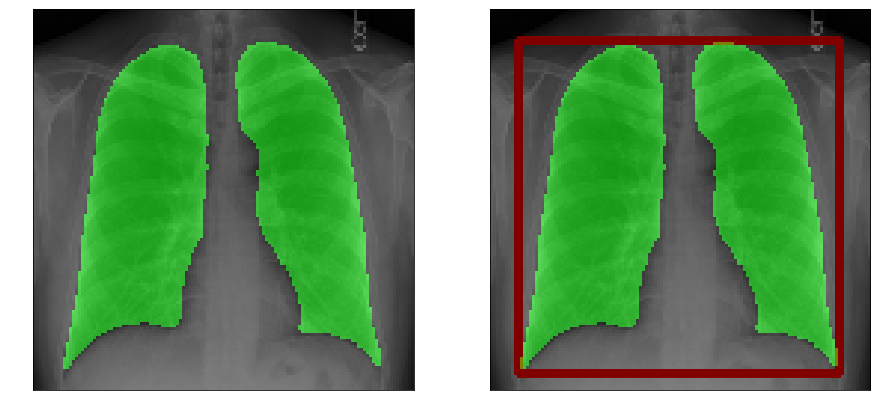

In [9]:
image = bbox_utils().resize_image(image = image, shape = (128, 128))
mask_contours = bbox_utils().resize_image(image = mask_contours, shape = (128, 128))

plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray', vmin = np.min(image), vmax = np.max(image))
plt.imshow(mask_contours, cmap = 'gray', alpha = 0.5, vmin = np.min(mask_contours), vmax = np.max(mask_contours))

plt.subplot(1, 2, 2)
coordinates = bbox_utils().extract_coordinates(mask = mask_contours, list_of_margins = [2, 2, 4, 2])
img_with_rectangle = bbox_utils().draw_rectangle(image = image, list_coordinates = coordinates)
plt.imshow(img_with_rectangle, cmap = 'gray', vmin = np.min(img_with_rectangle), vmax = np.max(img_with_rectangle))
plt.imshow(mask_contours, cmap = 'gray', alpha = 0.5, vmin = np.min(mask_contours), vmax = np.max(mask_contours))

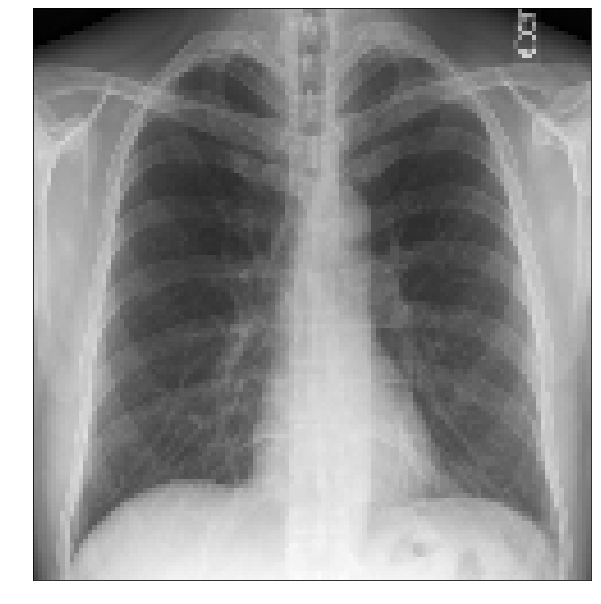

In [10]:
coordinates = bbox_utils().extract_coordinates(mask = mask_contours)
img_crop = bbox_utils().crop_image(image = image, list_coordinates = coordinates)

plt.figure(figsize = (10, 15))
plt.imshow(img_crop, cmap = 'gray', vmin = np.min(img_crop), vmax = np.max(img_crop))
bbox_utils().save_img(image = img_crop, path_file = '/content/image.png')

### 3. Testing the functions defined in the CheXpert dataset
***

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount = True)

!cp /content/gdrive/MyDrive/chexpert-v10-small.zip /content/
!unzip /content/chexpert-v10-small.zip
!rm /content/chexpert-v10-small.zip

In [15]:
dataframe = pd.read_csv('/content/CheXpert-v1.0-small/train.csv', delimiter = ',')

print(dataframe['Frontal/Lateral'].value_counts())
dataframe = dataframe[dataframe['Frontal/Lateral'] == 'Frontal']

print(dataframe['AP/PA'].value_counts())
dataframe = dataframe[(dataframe['AP/PA'] == 'AP') |
                      (dataframe['AP/PA'] == 'PA')]

path_files = np.array(dataframe['Path']).astype(str)

Frontal    191027
Lateral     32387
Name: Frontal/Lateral, dtype: int64
AP    161590
PA     29420
LL        16
RL         1
Name: AP/PA, dtype: int64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

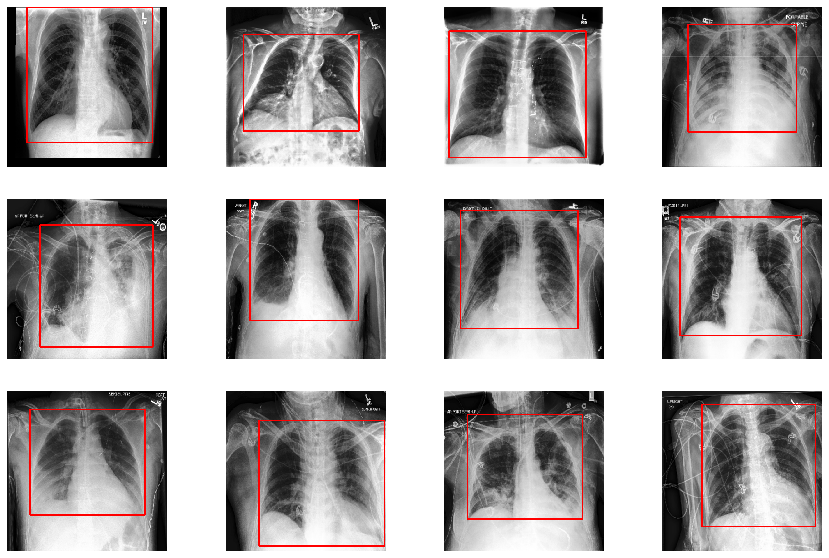

In [21]:
fig, axs = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))
for i in range(0, 3):
  for j in range(0, 4):
    count = random.randrange(0, len(path_files))
    image, mask = bbox_utils().make_segmentation(model = model, path_image = path_files[count])
    original_mask = bbox_utils().join_masks(lung_left = mask[0], lung_right = mask[1])
    image = bbox_utils().resize_image(image = image, shape = (320, 320))
    original_mask = bbox_utils().resize_image(image = original_mask, shape = (320, 320))
    contours = bbox_utils().get_contours(mask = original_mask.copy(), erode_radius = 10)
    contours = bbox_utils().find_two_best_areas(contours = contours)
    mask_contours = bbox_utils().draw_contours(contours = contours, image_shape = image.shape, dilate_radius = 6)
    list_coordinates = bbox_utils().extract_coordinates(mask = mask_contours, list_of_margins = [8, 8, 20, 8])
    axs[i][j].imshow(bbox_utils().draw_rectangle(image = image, list_coordinates = list_coordinates))
    axs[i][j].axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

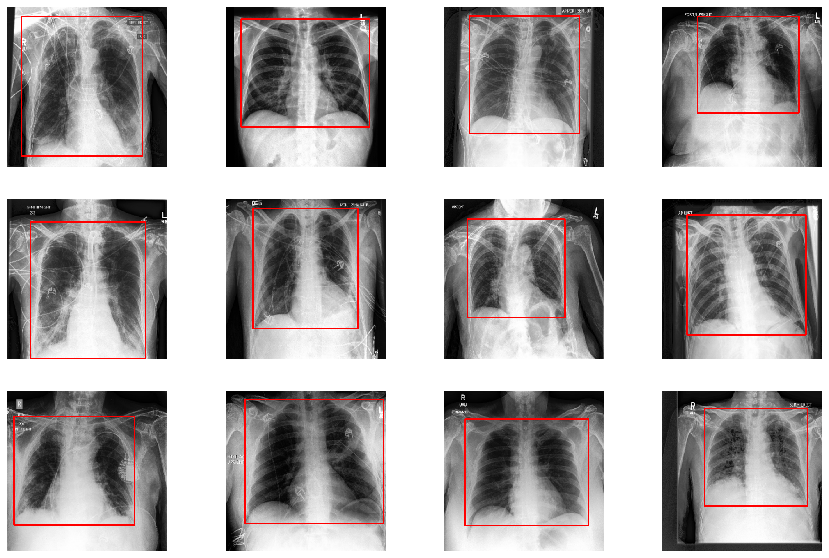

In [22]:
fig, axs = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))
for i in range(0, 3):
  for j in range(0, 4):
    count = random.randrange(0, len(path_files))
    image, mask = bbox_utils().make_segmentation(model = model, path_image = path_files[count])
    original_mask = bbox_utils().join_masks(lung_left = mask[0], lung_right = mask[1])
    image = bbox_utils().resize_image(image = image, shape = (320, 320))
    original_mask = bbox_utils().resize_image(image = original_mask, shape = (320, 320))
    contours = bbox_utils().get_contours(mask = original_mask.copy(), erode_radius = 10)
    contours = bbox_utils().find_two_best_areas(contours = contours)
    mask_contours = bbox_utils().draw_contours(contours = contours, image_shape = image.shape, dilate_radius = 6)
    list_coordinates = bbox_utils().extract_coordinates(mask = mask_contours, list_of_margins = [8, 8, 20, 8])
    axs[i][j].imshow(bbox_utils().draw_rectangle(image = image, list_coordinates = list_coordinates))
    axs[i][j].axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

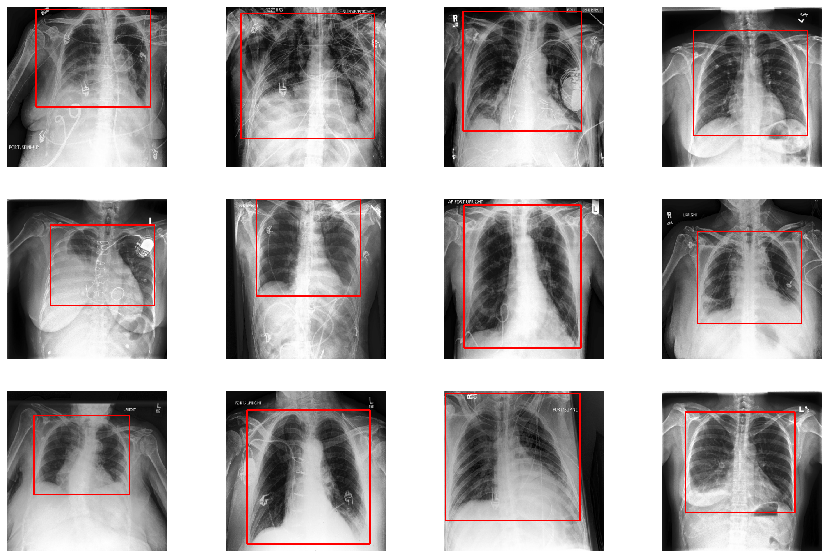

In [23]:
fig, axs = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))
for i in range(0, 3):
  for j in range(0, 4):
    count = random.randrange(0, len(path_files))
    image, mask = bbox_utils().make_segmentation(model = model, path_image = path_files[count])
    original_mask = bbox_utils().join_masks(lung_left = mask[0], lung_right = mask[1])
    image = bbox_utils().resize_image(image = image, shape = (320, 320))
    original_mask = bbox_utils().resize_image(image = original_mask, shape = (320, 320))
    contours = bbox_utils().get_contours(mask = original_mask.copy(), erode_radius = 10)
    contours = bbox_utils().find_two_best_areas(contours = contours)
    mask_contours = bbox_utils().draw_contours(contours = contours, image_shape = image.shape, dilate_radius = 6)
    list_coordinates = bbox_utils().extract_coordinates(mask = mask_contours, list_of_margins = [8, 8, 20, 8])
    axs[i][j].imshow(bbox_utils().draw_rectangle(image = image, list_coordinates = list_coordinates))
    axs[i][j].axis('off')

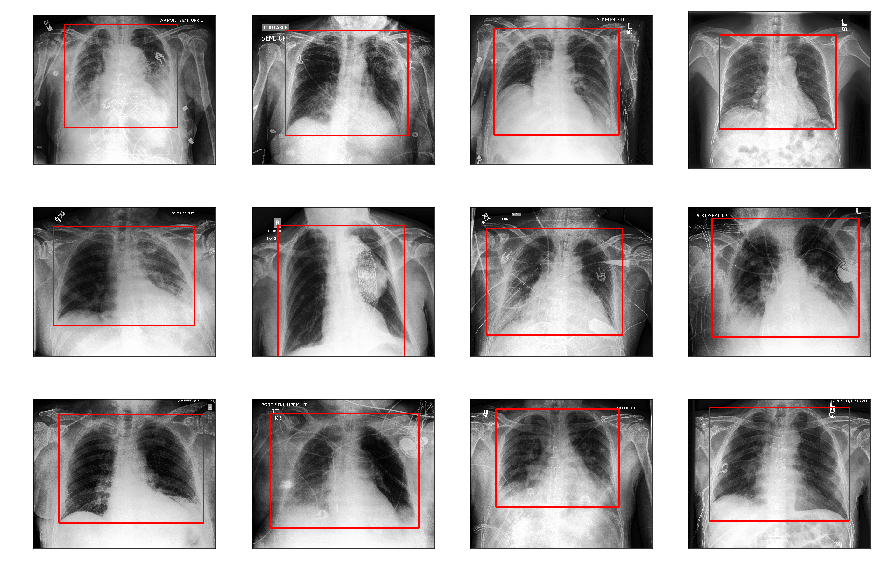

In [76]:
model_loc = tf.keras.models.load_model('model_vgg5')

fig, axs = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))
for i in range(0, 3):
  for j in range(0, 4):
    count = random.randrange(0, len(path_files))
    coordinates = make_localization_cnn(model = model_loc, path_file = path_files[count])
    image = bbox_utils().draw_rectangle(image = cv2.imread(path_files[count]), list_coordinates = coordinates[0])
    axs[i][j].imshow(image)